# Price of Wheat

Here we will clean the dataset containing the price of wheat.

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

We will start by storing the dataset into a dataframe. We got the dataset from http://www.indexmundi.com/commodities/?commodity=wheat&months=300.

In [2]:
price_df=pd.read_csv("data/price_of_wheat.csv")

IOError: File data/price_of_wheat.csv does not exist

In [3]:
price_df.head(20)

NameError: name 'price_df' is not defined

Let's clean up the dataframe and create a new column for year and month.

In [9]:
# change column names
price_df.columns = ['month-year', 'price', 'change']
# remove first row
price_df = price_df[~price_df['month-year'].isin(['Month'])]
# add columns for month and year
month = []
year = []
for row in price_df['month-year']:
    time = row.split('-')
    month.append(time[0])
    if time[1][0] == '9':
        year.append('19'+time[1])
    else:
        year.append('20'+time[1])
price_df['month'] = month
price_df['year'] = year
# remove month-year column
price_df = price_df.drop('month-year', axis=1)

Let's visualize how the price fluctuated over the year of 2014.

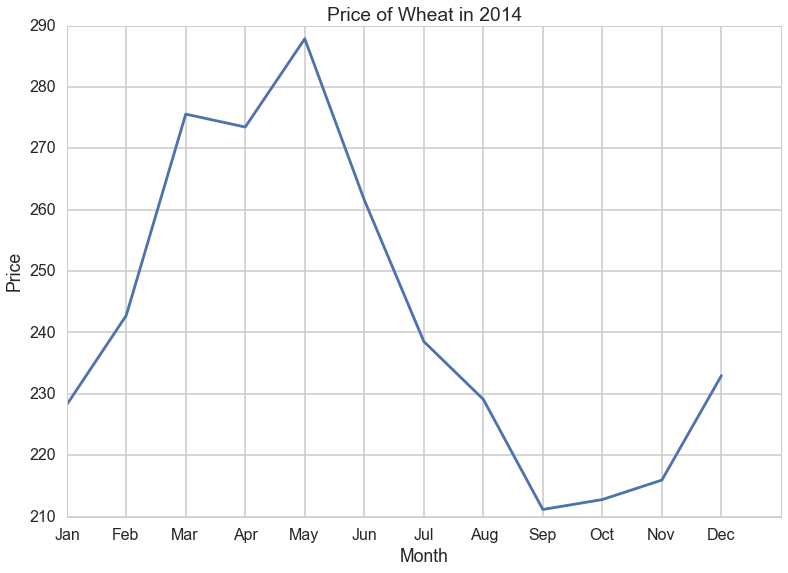

In [13]:
price_2014 = price_df[price_df.year == '2014'].reset_index()
plt.plot(price_2014.price)
plt.xticks(price_2014.index, price_2014.month)
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price of Wheat in 2014')